# Import del dataset

In [4]:
#Path file
percorso = '/content/drive/MyDrive/hateful_memes.zip'

In [5]:
#Unzip the file
import zipfile
with zipfile.ZipFile(percorso, 'r') as zip_ref:
    zip_ref.extractall('.')

In [6]:
#import json files
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train = pd.read_json('/content/hateful_memes/train.jsonl',lines=True)
val = pd.read_json('/content/hateful_memes/dev_seen.jsonl',lines=True)
test = pd.read_json('/content/hateful_memes/test_seen.jsonl',lines=True)

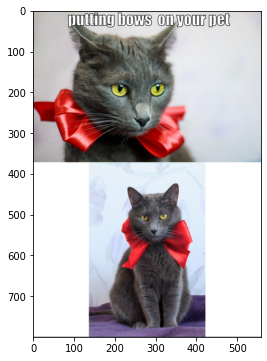

In [7]:
#Visualize dataset
path_base = '/content/hateful_memes'
plt.figure(figsize=(10,6))
img = plt.imread(path_base + '/' +train['img'][2])
plt.imshow(img)

In [8]:
#Funzione per visualizzare le immagini dato il path
def VisualizeImage(path):
  path_base = '/content/hateful_memes'
  plt.figure(figsize=(10,6))
  img = plt.imread(path_base + '/' +path)
  plt.imshow(img)

# Name Entity Recognition

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
def NameEntityRec(text):
  doc = nlp(text)
  words = []

  for token in doc:
    if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
      words.append(token.text)  
  return words  

In [11]:
#Prova per vedere cosa stampa
#text = train['text'][4]
#doc = nlp(text)
#print(text)

#words = []

#for token in doc:
  #print(token, token.pos_)
  #if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
    #words.append(token.text)

In [12]:
#Concateno le parole
#string=""
#for elem in words:
#  string += ' ' + elem 

# Object Detection

In [13]:
#Installo dipendenze per Object Detection
!pip install tensorflow==2.4.0
!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0
!pip install imageai --upgrade

In [14]:
#Definisco qui il modello di Object Detection
from imageai.Detection import ObjectDetection
import os

#path_drive_COCO = "/content/drive/MyDrive/resnet50_coco_best_v2.1.0.h5"
#path_drive_YOLO_tiny = "/content/drive/MyDrive/yolo-tiny.h5"
path_drive_YOLO = "/content/drive/MyDrive/yolo.h5"

#execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3() #Risulta essere veloce e mediamente accurato
#detector.setModelTypeAsRetinaNet()
#detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(path_drive_YOLO)
detector.loadModel()


In [15]:
#Prova per vedere i risultati di probabilità
#path_img = path_base + '/' +train['img'][50]
#print(path_img)
#tags = []
#detections = detector.detectObjectsFromImage(input_image=path_img, output_image_path="/content/output/imgnew1.jpg")

#for eachObject in detections:
#    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
#    tags.append(eachObject["name"])

In [16]:
#Definisco la funzione di Object Recognition
def ObjectRecognizer(path_img):
  
  detections = detector.detectObjectsFromImage(input_image=path_img, output_image_path="/content/output/imgnew1.jpg")
  tags = []

  for eachObject in detections:
    tags.append(eachObject["name"])

  return tags #Ritorno i tags con gli elementi trovati

# Generazione Dataframe

In [17]:
path_of_images = path_base+"/img"
rows = []

#Versione tagliata del train per motivi di tempo
train_cut = train.head(20)

for i in range(len(train_cut)):
  print("Elementi rimanenti: ", (len(train_cut)-i))
  #Creo i tags visivi
  tags = ObjectRecognizer(path_base+'/'+train_cut['img'][i])
  #Cerco i tags nella frase
  ner = NameEntityRec(train_cut['text'][i])

  #Creo la matrice
  rows.append([train_cut['img'][i], tags, ner, train_cut['text'][i]])

#Genero dalla matrice il DataFrame
informazioni_ricevute = pd.DataFrame(rows,columns=['img', 'tags', 'ner', 'testo'])

Elementi rimanenti:  20
Elementi rimanenti:  19
Elementi rimanenti:  18
Elementi rimanenti:  17
Elementi rimanenti:  16
Elementi rimanenti:  15
Elementi rimanenti:  14
Elementi rimanenti:  13
Elementi rimanenti:  12
Elementi rimanenti:  11
Elementi rimanenti:  10
Elementi rimanenti:  9
Elementi rimanenti:  8
Elementi rimanenti:  7
Elementi rimanenti:  6
Elementi rimanenti:  5
Elementi rimanenti:  4
Elementi rimanenti:  3
Elementi rimanenti:  2
Elementi rimanenti:  1


In [149]:
#Visualizzo i risultati del dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(informazioni_ricevute.head(11))

              img                                      tags  \
0   img/42953.png                          [person, person]   
1   img/23058.png                     [person, person, tie]   
2   img/13894.png                                [cat, cat]   
3   img/37408.png                                [dog, dog]   
4   img/82403.png                             [person, tie]   
5   img/16952.png  [person, person, person, person, person]   
6   img/76932.png                                [dog, dog]   
7   img/70914.png                                  [person]   
8   img/02973.png                                     [dog]   
9   img/58306.png                  [person, person, person]   
10  img/79351.png                                  [person]   

                                                  ner  \
0                                  [character, color]   
1                                                [ex]   
2                                         [bows, pet]   
3              

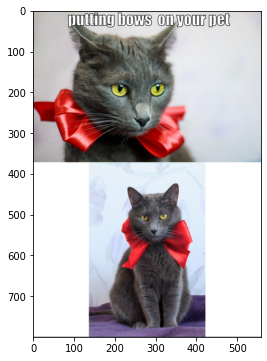

In [159]:
#Visualizzo il meme
VisualizeImage('img/13894.png')

# Wikidata

In [71]:
#Importiamo le dipendenze
import requests
import json

In [131]:
#Definiamo l'indirizzo base
API_WIKI = "https://wikidata.org/w/api.php"
n_risultati = 1

def SearchOnWiki(query):
  params ={
      'action': 'wbsearchentities',
      'format': 'json',
      'language': 'en',
      'limit' : n_risultati,
      'search': query
  }

  r = requests.get(API_WIKI, params=params)

  return r.json()

In [88]:
#Rimuove i duplicati dalla lista
def remove_duplicates(lista):
  return list(dict.fromkeys(lista))

In [138]:
#Dato un vettore di tag ritorna un DF con label e descrizione
def InformationRetrival(vettore_informazioni):
  #Rimuovo i duplicati
  vettore_informazioni = remove_duplicates(vettore_informazioni)
  #Nuova lista di conoscenza
  informazioni_da_wiki = []

  #Devo gestire il caso in cui il vettore di informazioni
  #abbia più elementi all'interno
  if len(vettore_informazioni) > 1:
    for elem in vettore_informazioni:
      json_file = SearchOnWiki(elem)
      informazioni_da_wiki.append([json_file['search'][0]['label'], json_file['search'][0]['description']])
  #Se il vettore ha un solo elemento
  else:
    json_file = SearchOnWiki(vettore_informazioni)
    informazioni_da_wiki.append([json_file['search'][0]['label'], json_file['search'][0]['description']])

  #Genero un pandas dataframe
  informazioni_da_wiki_pd = pd.DataFrame(informazioni_da_wiki,columns=['label', 'description'])

  return informazioni_da_wiki_pd


# Estrazione Conoscenza

In [147]:
#Prendiamo ora l'elemento 4 dalla tabella "informazioni_ricevute"
#che viene generato nella fase di "Generazione Dataframe"
#ed estraiamo conoscenza per TAG e NER
POSIZIONE=10
#TAG
print("Questa è conoscenza ricavata dai tag dell'immagine")
print(InformationRetrival(informazioni_ricevute['tags'][POSIZIONE]))
print("\n")
print("Questa è conoscenza ricavata dal ner del testo")
print(InformationRetrival(informazioni_ricevute['ner'][POSIZIONE]))

Questa è conoscenza ricavata dai tag dell'immagine
   label                                        description
0  human  common name of Homo sapiens, unique extant spe...


Questa è conoscenza ricavata dal ner del testo
           label                                        description
0  Jewish people  ancient nation and ethnoreligious group from t...
1     Madagascar  island sovereign state off the coast of Southe...


# Detecting Passive-Aggressive in text (PROVA)

In [21]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
metadata_pd = pd.concat([train, val])
metadata_pd = pd.concat([metadata_pd, test])

In [47]:
labels=metadata_pd.label
x_train,x_test,y_train,y_test=train_test_split(metadata_pd['text'], labels, test_size=0.2, random_state=7)

In [48]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [51]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 59.5%


In [52]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[829, 395],
       [415, 361]])

# Image Captioning (OSCAR?)

In [1]:
!git clone https://github.com/microsoft/Oscar.git

Cloning into 'Oscar'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 131 (delta 44), reused 34 (delta 34), pack-reused 58
Receiving objects: 100% (131/131), 726.16 KiB | 8.07 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
%cd Oscar

/content/Oscar


In [3]:
!python setup.py build develop

running install
running bdist_egg
running egg_info
creating oscar.egg-info
writing oscar.egg-info/PKG-INFO
writing dependency_links to oscar.egg-info/dependency_links.txt
writing top-level names to oscar.egg-info/top_level.txt
writing manifest file 'oscar.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'oscar.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/oscar
copying oscar/run_oscarplus_pretrain.py -> build/lib/oscar
copying oscar/run_nlvr.py -> build/lib/oscar
copying oscar/run_captioning.py -> build/lib/oscar
copying oscar/run_vqa.py -> build/lib/oscar
copying oscar/__init__.py -> build/lib/oscar
copying oscar/run_retrieval.py -> build/lib/oscar
copying oscar/run_gqa.py -> build/lib/oscar
creating build/lib/oscar/utils
copying oscar/utils/cbs.py -> build/lib/oscar/utils
copying oscar/utils/tsv_file.py -> build/lib/oscar/utils
copying osc

In [4]:
%cd ..

/content


In [5]:
%rm -rf Oscar

# DeepFace(?)

In [ ]:
!pip install deepface
from deepface import DeepFace

In [32]:
def RilevazioneVolto(path):
  
  path_deepface = '/content/hateful_memes/' + path
  try:
    obj = DeepFace.analyze(img_path = path_deepface, actions = ['gender', 'race', 'emotion'], prog_bar=False)
  except:
    obj = {
        "gender" : None,
        "dominant_race"   : None,
        "dominant_emotion": None
    }

  return obj

In [33]:
#Genero informazioni a partire dal volto (detection della race)
informazioni_volto = []
for i in range(len(informazioni_ricevute)):
  path = informazioni_ricevute['img'][i]
  rilevazione = RilevazioneVolto(path)
  informazioni_volto.append([path, rilevazione['gender'],rilevazione['dominant_race'],rilevazione['dominant_emotion']])
informazioni_volto_pd = pd.DataFrame(informazioni_volto, columns=['img', 'gender', 'race', 'emotion'])

In [36]:
print(informazioni_volto_pd.head(20))

              img gender            race   emotion
0   img/42953.png   None            None      None
1   img/23058.png   None            None      None
2   img/13894.png   None            None      None
3   img/37408.png    Man           white     happy
4   img/82403.png   None            None      None
5   img/16952.png    Man           black   neutral
6   img/76932.png   None            None      None
7   img/70914.png   None            None      None
8   img/02973.png   None            None      None
9   img/58306.png  Woman           white     angry
10  img/79351.png    Man           white     angry
11  img/34096.png   None            None      None
12  img/25489.png    Man           white      fear
13  img/19324.png   None            None      None
14  img/79346.png  Woman           white     happy
15  img/13426.png  Woman           white     happy
16  img/97628.png    Man           black  surprise
17  img/14238.png    Man  middle eastern       sad
18  img/28936.png   None       